### Bayesian Data Analysis, 3rd ed
## Chapter 2, demo 3

원저자:
- Aki Vehtari <aki.vehtari@aalto.fi>
- Tuomas Sivula <tuomas.sivula@aalto.fi>

2차저자:
- 문현지, 민태규

전치태반 여아 출생 가능성(BDA3 p. 37)

Beta(438,544)로부터 
추출된 표본으로 분위수에 대한 $\theta$의 히스토그램을 그리고, 

$\theta$를 변환한 변수 $\phi$에 대해서도 동일 작업 반복

In [124]:
import numpy as np
from scipy.stats import beta
%matplotlib inline
import matplotlib.pyplot as plt

#자주 사용할 plot관련 함수가 있는 plot_tools의 import를 위해 해당 경로를 시스템 경로에 추가
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

import plot_tools

1. $\theta$ 에 대한 히스토그램과 신용구간 표시

사후분포에서 추출한 표본을 바탕으로 얻은 구간을 신용구간이라 하고, 이는 신뢰구간과 차이가 있습니다. 더 자세한 비교는 다음 링크 참고: https://freshrimpsushi.tistory.com/752?category=771947

참고로 beta(1,1)은 uniform분포고, $alpha$, $beta$가 커질수록 분산이 작아져 더 informative한 사전분포가 됩니다. 

Text(0.5, 0, '$\\theta$')

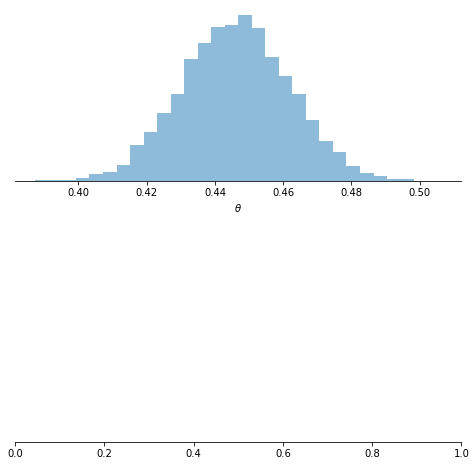

In [117]:
# 그리드 설정
x = np.linspace(0.36, 0.54, 150)

# Beta(438,544)로부터 10000개의 표본을 추출
n = 10000
th = beta.rvs(438, 544, size=n)  # rvs는 랜덤변수의 의미, 즉 베타분포로부터 추출한 랜덤변수

# 2개의 subplot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
# x축만 보여줌
plot_tools.modify_axes.only_x(axes)
# spacing 조절
fig.subplots_adjust(hspace=0.5)

#  표본 바탕으로 2.5% 와 97.5% 분위수 추정
th25, th975 = np.percentile(th, [2.5, 97.5])
axes[0].hist(th, bins=30, color=plot_tools.lighten('C0'))
axes[0].set_xlabel(r'$\theta$')

In [118]:
th25, th975

(0.4158162302863426, 0.4769432047159643)

0.4155와 0.476이 95% 신용구간이 됩니다. 이 범위를 histgram에 그려보겠습니다.

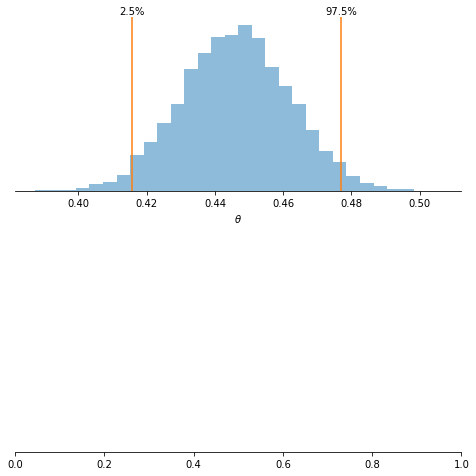

In [119]:
axes[0].axvline(th25, color='C1')
axes[0].axvline(th975, color='C1')
axes[0].text(
    th25,
    axes[0].get_ylim()[1]+15,
    '2.5%',
    horizontalalignment='center'
)
axes[0].text(
    th975,
    axes[0].get_ylim()[1]+15,
    '97.5%',
    horizontalalignment='center'
)
fig

2. $\phi$ 에 대한 히스토그램과 신용구간 표시

$theta$/(1-$theta$) 변환을 통해 정규근사 가정을 더 잘 만족하는 변수 $\phi$를 만들 수 있습니다 (BDA p.37).

해당 변수에 대해 히스토그램과 신용구간을 구해보고 $theta$와 비교해봅니다.

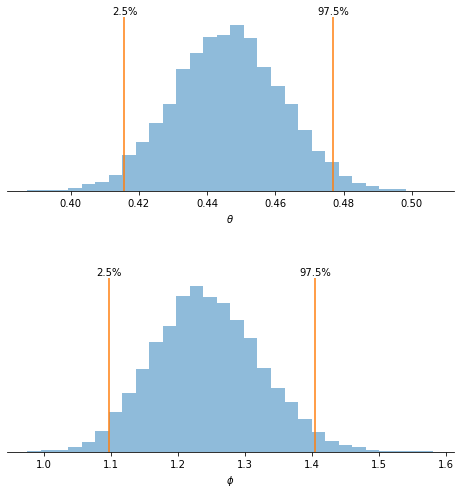

In [120]:
phi = (1-th)/th
axes[1].hist(phi, bins=30, color=plot_tools.lighten('C0'))

# 표본 바탕으로 2.5% 와 97.5% 분위수 추정
phi25, phi975 = np.percentile(phi, [2.5, 97.5])

# 분위수 표시
axes[1].axvline(phi25, color='C1')
axes[1].axvline(phi975, color='C1')
axes[1].text(
    phi25,
    axes[1].get_ylim()[1]+15,
    '2.5%',
     horizontalalignment='center'
)
axes[1].text(
    phi975,
    axes[1].get_ylim()[1]+15,
    '97.5%',
    horizontalalignment='center'
)
axes[1].set_xlabel(r'$\phi$');
fig

In [121]:
phi25, phi975

(1.0966857062147919, 1.4049085321270756)

유럽 평균인 1.06보다 큰 값에서 신용구간이 형성됩니다.